In [1]:
from neko.core.network import Network
from neko._visual.visualize_network import NetworkVisualizer
from neko._inputs.resources import Resources
from neko._annotations.gene_ontology import Ontology
import omnipath as op
import pandas as pd

Selecting as resources just Omnipath

In [2]:
omnipath = op.interactions.OmniPath().get()

First set the folder for input and output

In [3]:
data_folder = "../../../data/"

figures_folder = "../../Figures/WNT/"

sif_output = "../../sif_files/WNT/"

Loading the data from Antoine

In [4]:
data = pd.read_csv(data_folder + "gene_per_subgroup_correlation_sorted_melt.csv")

In [5]:
# Sorting the plot_df by correlation in descending order and selecting the top N genes per group
top_n = 50  # Set the desired number of genes to display per group

top_genes_per_group = data.groupby('Group').apply(lambda x: x.nlargest(top_n, 'Correlation')).reset_index(drop=True)

top_genes_per_group

/tmp/ipykernel_17626/189381725.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_genes_per_group = data.groupby('Group').apply(lambda x: x.nlargest(top_n, 'Correlation')).reset_index(drop=True)


,Gene,Group,Correlation
0,ZFPM2,Group3,0.957692
1,FOXG1,Group3,0.947957
2,FSTL5,Group3,0.942308
3,PAPPA2,Group3,0.941538
4,IMPG2,Group3,0.941538
...,...,...,...
195,LRRC55,WNT,0.876923
196,SYT1,WNT,0.875385
197,SYT2,WNT,0.874615
198,PLXDC1,WNT,0.872308


In [6]:
wnt_list = top_genes_per_group[top_genes_per_group["Group"] == "WNT"]["Gene"].reset_index(drop=True).to_list()

Selecting just WNT group

In [7]:
wnt_list

['ZFPM2',
 'GALNT14',
 'LRIG3',
 'ZIC2',
 'FAM174B',
 'RAI2',
 'APCDD1',
 'TAL2',
 'ZIC5',
 'RBP1',
 'DSC2',
 'EVC2',
 'KCTD17',
 'ZMAT4',
 'RTKN',
 'RASL11B',
 'LHX8',
 'SP5',
 'EMID1',
 'MEIS1',
 'GGACT',
 'SLC24A2',
 'CDKN1C',
 'HOXC5',
 'PRMT8',
 'HRASLS5',
 'NRTN',
 'EVC',
 'MFNG',
 'PDGFC',
 'GAP43',
 'FBXL7',
 'HOXD4',
 'DSP',
 'PCSK1',
 'HS3ST1',
 'HUNK',
 'EOGT',
 'HECW1',
 'GXYLT2',
 'NKD2',
 'BMP7',
 'VRK2',
 'C18orf42',
 'TOM1L1',
 'LRRC55',
 'SYT1',
 'SYT2',
 'PLXDC1',
 'IL17D']

# Creating a Network starting from All Omnipath interactions

In [8]:
wnt_net = Network(wnt_list, resources = omnipath)

Error: node GALNT14 is not present in the resources database
Error: node LRIG3 is not present in the resources database
Error: node FAM174B is not present in the resources database
Error: node RAI2 is not present in the resources database
Error: node ZIC5 is not present in the resources database
Error: node KCTD17 is not present in the resources database
Error: node ZMAT4 is not present in the resources database
Error: node RASL11B is not present in the resources database
Error: node LHX8 is not present in the resources database
Error: node SP5 is not present in the resources database
Error: node EMID1 is not present in the resources database
Error: node GGACT is not present in the resources database
Error: node HOXC5 is not present in the resources database
Error: node HRASLS5 is not present in the resources database
Error: node FBXL7 is not present in the resources database
Error: node HS3ST1 is not present in the resources database
Error: node EOGT is not present in the resources da

Adding the node that were not found manually: HOXDB13 --> HOXD13, HOXDB --> HOXD9, Q8N9L1 --> ZIC4

In [9]:
wnt_net.nodes

,Genesymbol,Uniprot,Type
0,ZFPM2,Q8WW38,NaN
1,ZIC2,O95409,NaN
2,APCDD1,Q8J025,NaN
3,TAL2,Q16559,NaN
4,RBP1,P09455,NaN
5,DSC2,Q02487,NaN
6,EVC2,Q86UK5,NaN
7,RTKN,Q9BST9,NaN
8,MEIS1,O00470,NaN
9,SLC24A2,Q9UI40,NaN


In [10]:
%%time
wnt_net.complete_connection(maxlen=4, only_signed=True, connect_with_bias=False, consensus=True)

CPU times: user 11.4 s, sys: 982 µs, total: 11.4 s
Wall time: 11.4 s


In [11]:
wnt_net.nodes

,Genesymbol,Uniprot,Type
0,ZFPM2,Q8WW38,NaN
1,ZIC2,O95409,NaN
2,APCDD1,Q8J025,NaN
3,TAL2,Q16559,NaN
4,RBP1,P09455,NaN
5,DSC2,Q02487,NaN
6,EVC2,Q86UK5,NaN
7,RTKN,Q9BST9,NaN
8,MEIS1,O00470,NaN
9,SLC24A2,Q9UI40,NaN


In [12]:
wnt_net.convert_edgelist_into_genesymbol()

,source,target,Type,Effect,References
0,RBP1,GRB2,None,stimulation,CA1:10995764; CA1:10995764
1,GRB2,PTPRA,None,inhibition,Adhesome:11923305;Adhesome:7518772;Adhesome:86...
2,PTPRA,FYN,None,bimodal,Adhesome:10562275;Adhesome:12682088;Adhesome:1...
3,FYN,TOM1L1,None,stimulation,BioGRID:11711534;HPRD:11711534;KEA:11711534;Pr...
4,HECW1,DVL1,None,inhibition,HPRD:14684739;SIGNOR:14684739;SPIKE:14684739;S...
...,...,...,...,...,...
74,PIK3R1,RAC1,None,stimulation,HPRD:12086876;HPRD:7629060;HPRD:8034624;SPIKE:...
75,PRKACA,LRRK2,None,inhibition,ProtMapper:24351927;SIGNOR:24351927;iPTMnet:21...
76,PRKCA,RAC1,None,stimulation,ACSN:18851840;ACSN:20027184;ACSN:21474067;Adhe...
77,PRKCA,MAPK1,None,stimulation,ProtMapper:11704645;ProtMapper:12598525;ProtMa...


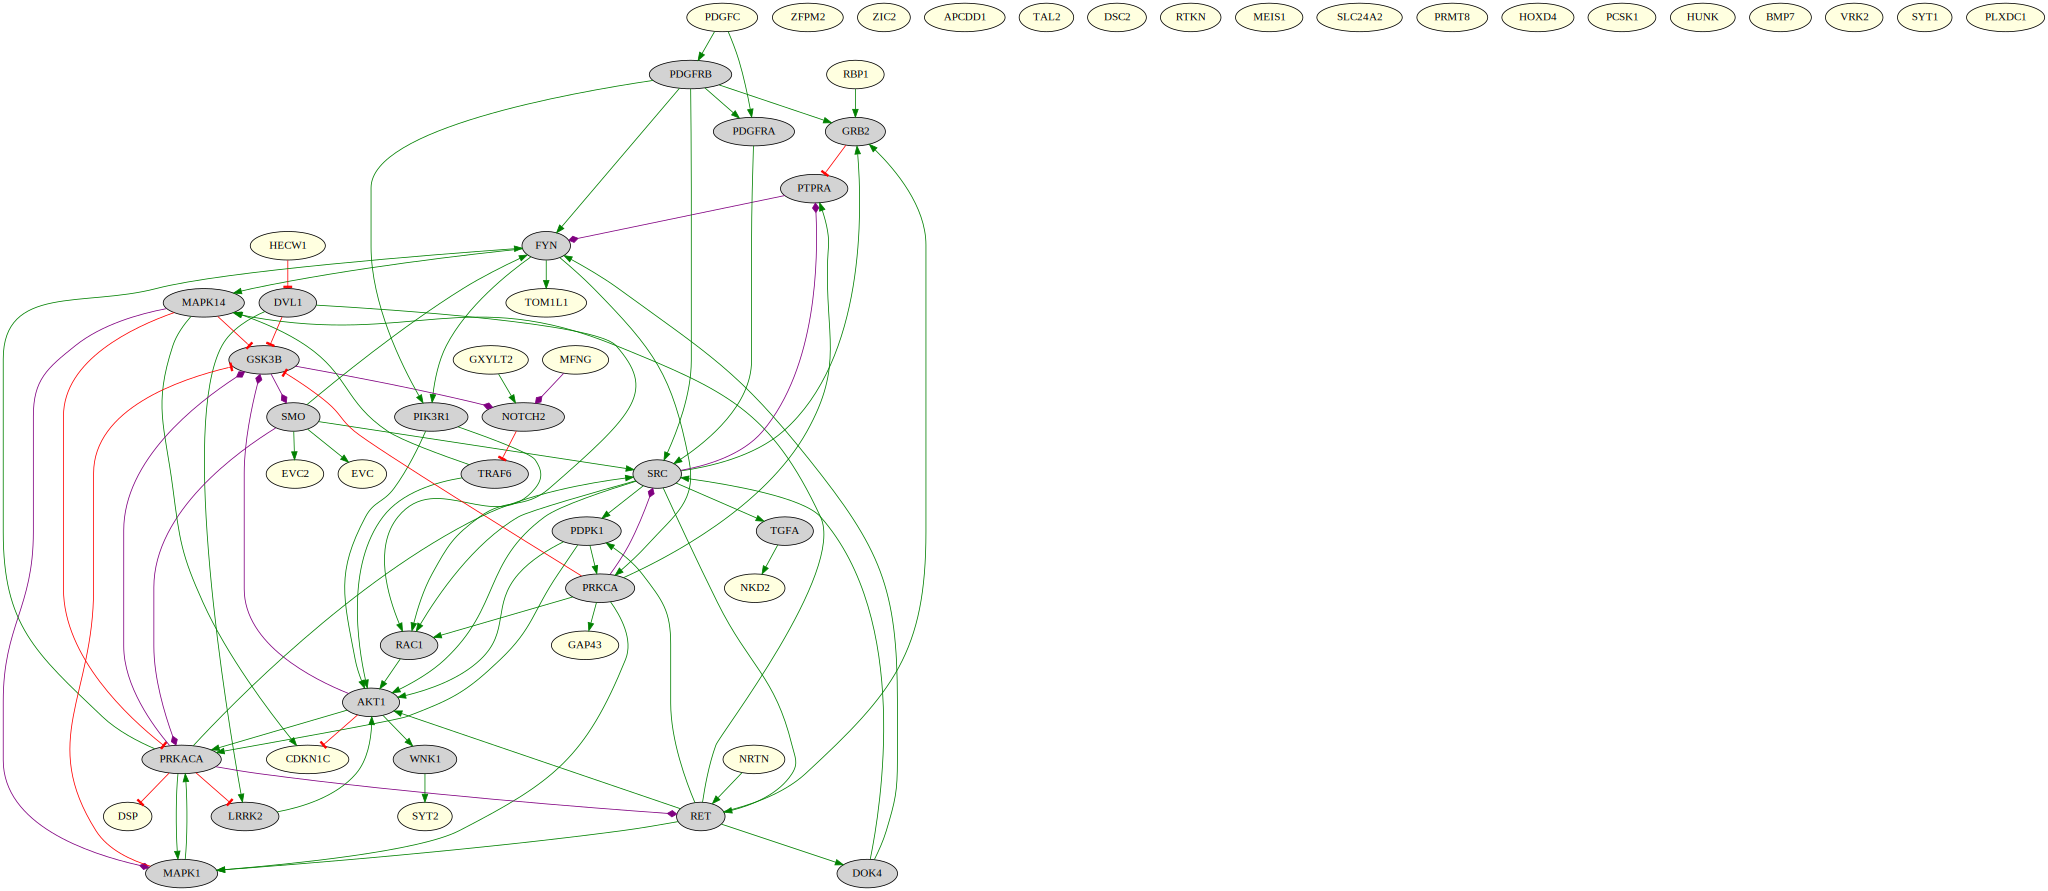

In [13]:
wnt_visualizer = NetworkVisualizer(wnt_net,color_by='effect', noi=True)
output = figures_folder + "WNT_omnipath_Lin"
wnt_visualizer.render(output_file=output)

# Using BFS - too many disconnected nodes, very disappointing

In [14]:
wnt_net_bfs = Network(wnt_list, resources = omnipath)

Error: node GALNT14 is not present in the resources database
Error: node LRIG3 is not present in the resources database
Error: node FAM174B is not present in the resources database
Error: node RAI2 is not present in the resources database
Error: node ZIC5 is not present in the resources database
Error: node KCTD17 is not present in the resources database
Error: node ZMAT4 is not present in the resources database
Error: node RASL11B is not present in the resources database
Error: node LHX8 is not present in the resources database
Error: node SP5 is not present in the resources database
Error: node EMID1 is not present in the resources database
Error: node GGACT is not present in the resources database
Error: node HOXC5 is not present in the resources database
Error: node HRASLS5 is not present in the resources database
Error: node FBXL7 is not present in the resources database
Error: node HS3ST1 is not present in the resources database
Error: node EOGT is not present in the resources da

In [15]:
%%time
wnt_net_bfs.complete_connection(maxlen=4, algorithm="bfs", only_signed=False, connect_with_bias=False, consensus=False)

CPU times: user 14.7 s, sys: 843 µs, total: 14.7 s
Wall time: 14.7 s


In [16]:
wnt_net_bfs.edges

,source,target,Type,Effect,References
0,O95409,P21728,None,undefined,SPIKE:11390978;SPIKE_LC:11390978; SPIKE:113909...
1,P21728,P63092,None,stimulation,CA1:1832710;CA1:2898118; CA1:1832710;CA1:2898118
2,P63092,P07550,None,undefined,BioGRID:12036966;Lit-BM-17:12036966;Lit-BM-17:...
3,P07550,Q16653,None,undefined,Cellinker:23023127; Cellinker:23023127
4,Q16653,Q8J025,None,undefined,Cellinker:32589946; Cellinker:32589946
...,...,...,...,...,...
357,P06493,Q04721,None,undefined,KEA:17570479
358,P00519,P62993,None,bimodal,Adhesome:10592173;Adhesome:16955467;Adhesome:1...
359,P06493,P00519,None,stimulation,HPRD-phos:18452278;HPRD-phos:18669648;HPRD-pho...
360,P78527,P00519,None,stimulation,HPRD:9312071;KEA:17570479;SPIKE:18157161;SPIKE...


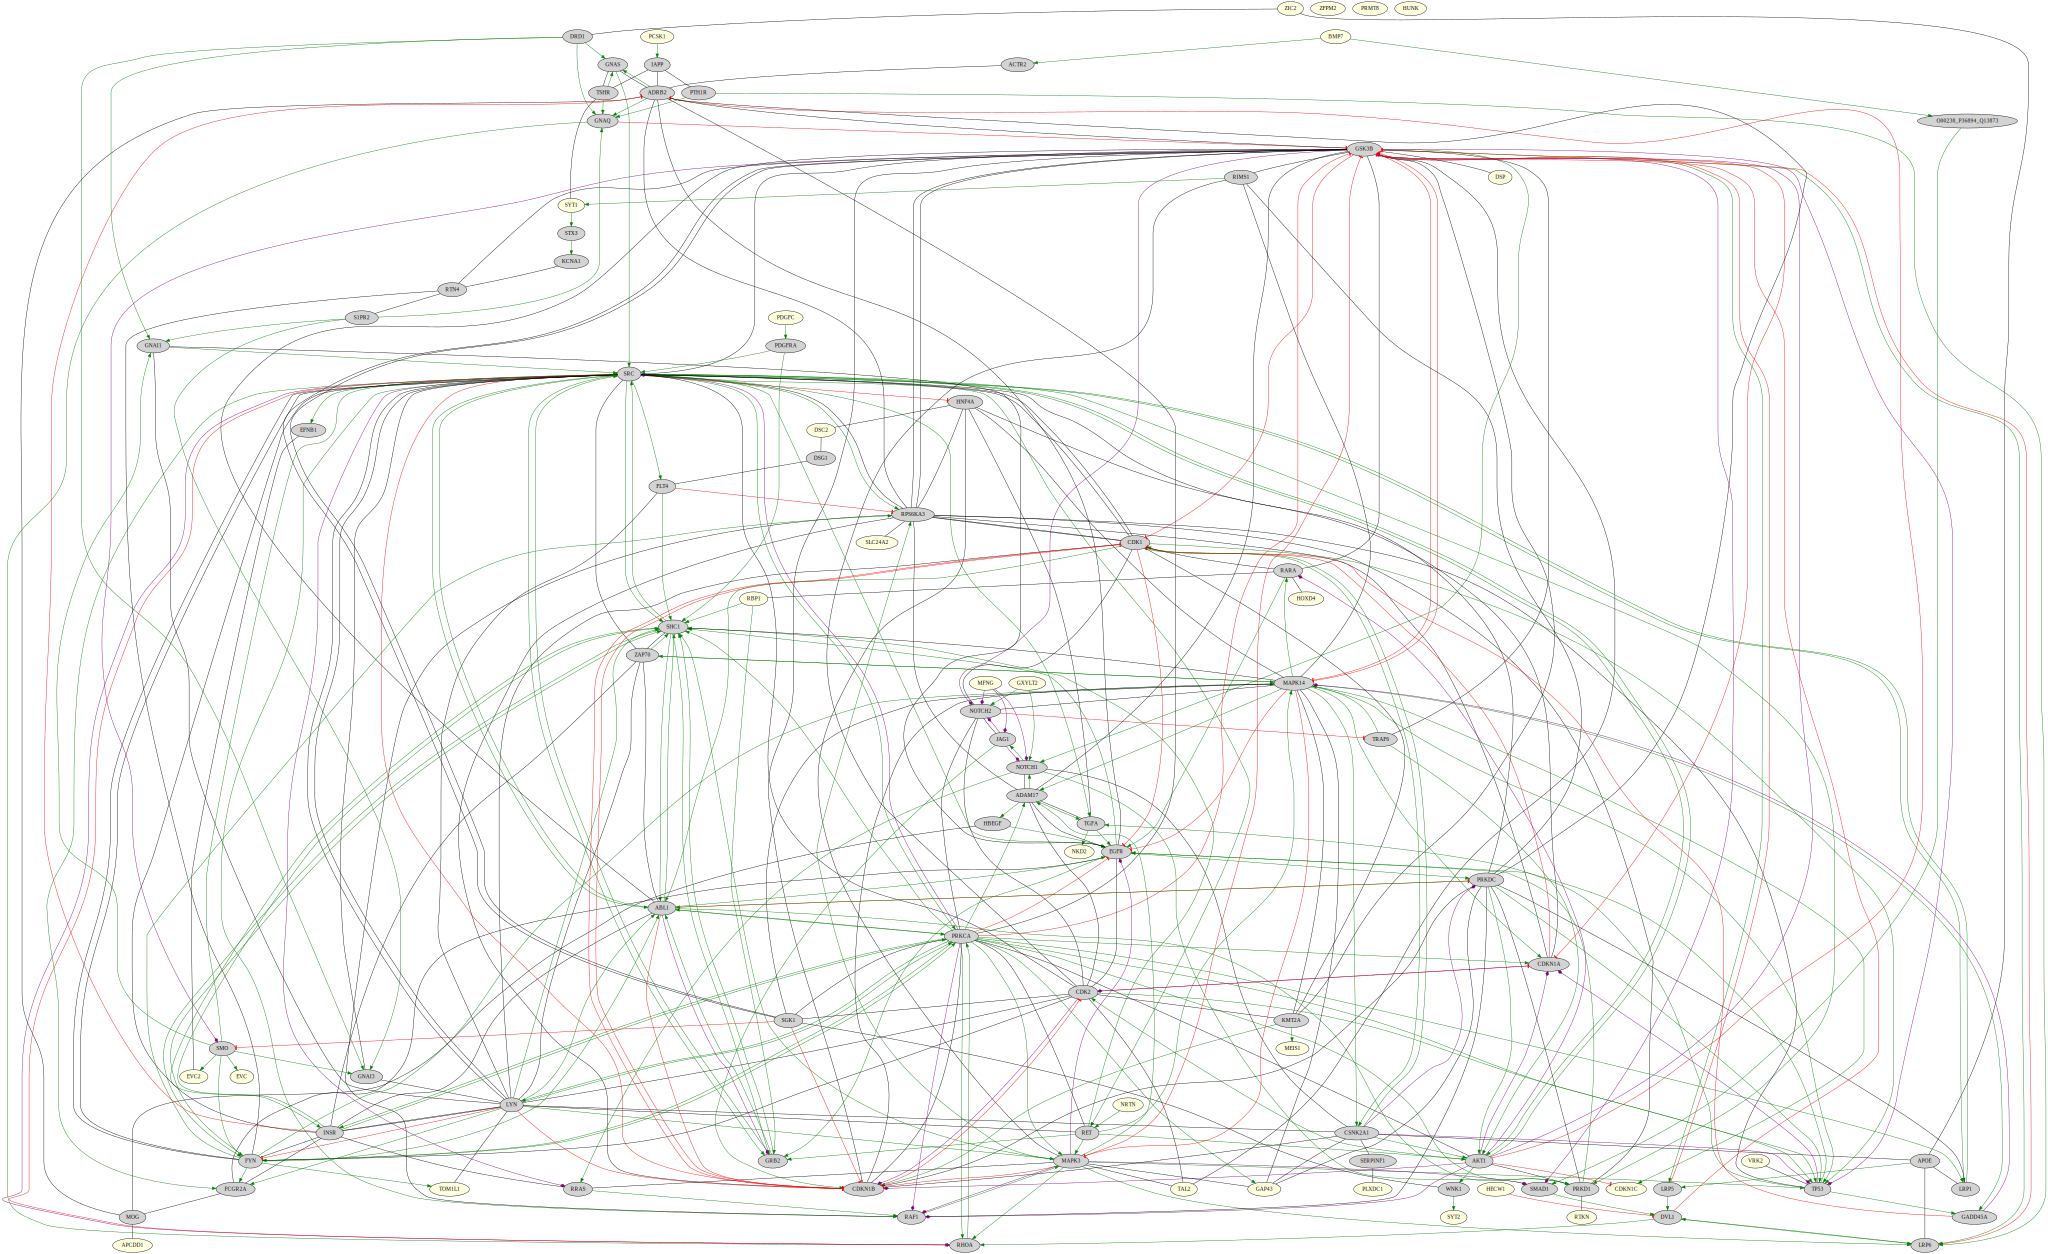

In [17]:
wnt_visualizer_bfs = NetworkVisualizer(wnt_net_bfs,color_by='effect', noi=True)
output = figures_folder + "WNT_omnipath_Lin_bfs"
wnt_visualizer_bfs.render(output_file=output)

# Using radial strategy - still too many disconnected nodes, very disappointing

In [18]:
wnt_net_radial = Network(wnt_list, resources = omnipath)

Error: node GALNT14 is not present in the resources database
Error: node LRIG3 is not present in the resources database
Error: node FAM174B is not present in the resources database
Error: node RAI2 is not present in the resources database
Error: node ZIC5 is not present in the resources database
Error: node KCTD17 is not present in the resources database
Error: node ZMAT4 is not present in the resources database
Error: node RASL11B is not present in the resources database
Error: node LHX8 is not present in the resources database
Error: node SP5 is not present in the resources database
Error: node EMID1 is not present in the resources database
Error: node GGACT is not present in the resources database
Error: node HOXC5 is not present in the resources database
Error: node HRASLS5 is not present in the resources database
Error: node FBXL7 is not present in the resources database
Error: node HS3ST1 is not present in the resources database
Error: node EOGT is not present in the resources da

In [19]:
%%time
wnt_net_radial.connect_network_radially(max_len=3, consensus=False, only_signed=False)

CPU times: user 5min 2s, sys: 18.4 ms, total: 5min 2s
Wall time: 5min 2s


In [20]:
wnt_net_radial.edges

,source,target,Type,Effect,References
2,Q86Y07,Q96EV8,None,undefined,PhosphoSite:30062698;ProtMapper:30062698
3,Q86Y07,P04637,None,undefined,iPTMnet:16704422
8,P18075,O00238,None,stimulation,Baccin2019:106311828605097;CellTalkDB:15621726...
9,P18075,P17813,None,undefined,Baccin2019:9872992;CellTalkDB:9872992;Cellinke...
14,P18075,Q04771,None,stimulation,Baccin2019:122976748006002;CellTalkDB:31619522...
...,...,...,...,...,...
13837,P07948,Q12972,None,inhibition,HPRD:11104670;InnateDB:11104670;KEA:11104670;P...
13838,O00141,Q12972,None,undefined,KEA:17570479
13839,P68400,Q12972,None,stimulation,HPRD:9407077;KEA:9407077;ProtMapper:9407077;SI...
13840,P22694,Q12972,None,undefined,KEA:17570479


# Exporting Network in sif file

In order to export a fully connected network in sif file, I remove the nodes that are not connected

In [21]:
from neko._outputs.exports import Exports

In [22]:
for node in wnt_net.nodes["Uniprot"]:
    if node not in wnt_net.edges["source"].values and node not in wnt_net.edges["target"].values:
        node = wnt_net.nodes[ wnt_net.nodes["Uniprot"] == node]["Genesymbol"].values
        print( node)
        wnt_net.remove_node(node[0])

['ZFPM2']
['ZIC2']
['APCDD1']
['TAL2']
['DSC2']
['RTKN']
['MEIS1']
['SLC24A2']
['PRMT8']
['HOXD4']
['PCSK1']
['HUNK']
['BMP7']
['VRK2']
['SYT1']
['PLXDC1']


In [23]:
export = Exports(wnt_net)

In [24]:
export.export_sif(sif_output + "WNT_omnipath.sif")